In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

df = pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [5]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
df.drop('flight',axis=1,inplace=True)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['arrival_time'].value_counts()

arrival_time
Night            90712
Evening          77960
Morning          62054
Afternoon        38030
Early_Morning    15333
Late_Night       13851
Name: count, dtype: int64

<Axes: xlabel='duration', ylabel='price'>

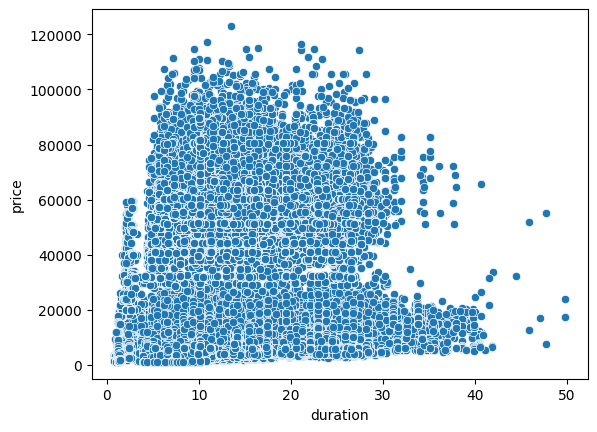

In [9]:
sns.scatterplot(x='duration',y='price',data=df)

In [10]:
df2 = pd.get_dummies(df).astype(int)
df2

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,2,1,5953,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,2,1,5953,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
2,2,1,5956,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2,1,5955,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,2,1,5955,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,10,49,69265,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
300149,10,49,77105,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
300150,13,49,79099,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
300151,10,49,81585,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [11]:
x = df2.drop('price',axis=1)

In [12]:
y = df2['price']

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC,SVR # SVM --> Support Vector Machine
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

In [15]:
lnr = LinearRegression()
lnr.fit(x_train,y_train)

print("LinearRegression Train :",lnr.score(x_train,y_train))
print("LinearRegression Test :",lnr.score(x_test,y_test))

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

print("Decision Tree Regressor Train :",dtr.score(x_train,y_train))
print("Decision Tree Regressor Test :",dtr.score(x_test,y_test))



LinearRegression Train : 0.9116823030457304
LinearRegression Test : 0.9115397966749273
Decision Tree Regressor Train : 0.9945196546638561
Decision Tree Regressor Test : 0.9639477446683284


In [16]:
rtr = RandomForestRegressor(n_estimators=20)
rtr.fit(x_train,y_train)

print("Random Forest Train :",rtr.score(x_train,y_train))
print("Random Forest Test :",rtr.score(x_test,y_test))

Random Forest Train : 0.9925983943433944
Random Forest Test : 0.9746615458715893


In [17]:
# svr = SVR()
# svr.fit(x_train,y_train)

# print("SVR Train :",svr.score(x_train,y_train))
# print("SVR Test :",svr.score(x_test,y_test))

In [18]:
# knr = KNeighborsRegressor()
# knr.fit(x_train,y_train)

# # print("KNeighborsRegressor Train :",knr.score(x_train,y_train))
# print("KNeighborsRegressor Test :",knr.score(x_test,y_test))

In [22]:
x_train.columns

Index(['duration', 'days_left', 'airline_AirAsia', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'source_city_Bangalore', 'source_city_Chennai',
       'source_city_Delhi', 'source_city_Hyderabad', 'source_city_Kolkata',
       'source_city_Mumbai', 'departure_time_Afternoon',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'stops_one', 'stops_two_or_more', 'stops_zero',
       'arrival_time_Afternoon', 'arrival_time_Early_Morning',
       'arrival_time_Evening', 'arrival_time_Late_Night',
       'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Bangalore', 'destination_city_Chennai',
       'destination_city_Delhi', 'destination_city_Hyderabad',
       'destination_city_Kolkata', 'destination_city_Mumbai', 'class_Business',
       'class_Economy'],
      dtype='object')

In [24]:
import joblib

joblib.dump(rtr,'Flight_Model.lb')

['Flight_Model.lb']